In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings; 
warnings.filterwarnings('ignore')
## Set Options
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 350)

In [2]:
os.getcwd()

'/Users/sameershekhar/Documents/Machine_Learning_Projects/MLE2EProject/Machine-Learning-E2E-Wallethub/notebooks'

In [3]:
os.chdir('/Users/sameershekhar/Documents/Machine_Learning_Projects/MLE2EProject/Machine-Learning-E2E-Wallethub')

In [4]:
os.getcwd()

'/Users/sameershekhar/Documents/Machine_Learning_Projects/MLE2EProject/Machine-Learning-E2E-Wallethub'

In [5]:
raw_file = '/Users/sameershekhar/Documents/Machine_Learning_Projects/MLE2EProject/Machine-Learning-E2E-Wallethub/wallethub/\
artifact/data_ingestion/2022-07-19-20-54-49/raw_data/dataset_00_with_header.csv'
df = pd.read_csv(raw_file)

# Getting Shape of Data
print(f"Shape of data: {df.shape}")

Shape of data: (100000, 305)


In [6]:
df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,1,NaN,0,0,300.0,300.0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0.0,300.0,0,NaN,NaN,NaN,0,0,NaN,0,0,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.0000,0,0,NaN,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,706
1,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,2,0,1,0,0,1,0,14,7,8,10,11,8,1,2,4,5,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,8,0,1,1,2,4,8,0,0,0,0,0,0,0,7,0,22375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,1,4582,4.0,4.0,4.0,0.9256,1,1,1,0.9339,5206,0,NaN,0,0,0,5206,0,5206,1,1,1,2,0,1.0,4.0,3.0,3.5,5206,5206,0.9339,0,NaN,5206,0.9339,1,1,1,0,NaN,0,NaN,558
2,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,3,4,1,0,9,0,9,2,0,9,0,2,0,0,0,0,1,0,0,3,4,0,0,0,0,1,0,0,0,0,NaN,0,0,1800.0,200.0,0,0,0,0,0,0,0,0,0,0,2,NaN,NaN,3,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3287,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,5,0,0,0,0,5,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,1613,1026.0,1800.0,0,NaN,NaN,NaN,5,0,NaN,0,0,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.2281,1613,1613,0.4814,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,577
3,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,1,1,1,1,7,2,5,5,2,4,1,3,1,3,0,0,1,0,0,3,1,0,0,1,1,1,0,0,1,1,1.5200,300,-156,4000.0,100.0,0,0,0,0,0,0,0,0,0,0,2,1.52,1.5200,5,0,0,0,0,5,5,3,0,0,0,0,3,3,5,3,684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,101.0,1,1,0,0,0,0,0,2,2,0,0,0,5,2,4,5,5,5,2,4,5

In [16]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
df["temp_y"] = pd.cut(
            df["y"],
            bins = [210,310, 410, 510, 610, 710, 810, 910],
            labels=[1,2,3,4,5,6,7]
        )

strat_train_set = None
strat_test_set = None

# split = StratifiedKFold(n_splits=2, random_state=None, shuffle = False)
split = StratifiedShuffleSplit(n_splits=2, test_size = 0.2,random_state=42)

for train_index, test_index in split.split(df, df["temp_y"]):
    strat_train_set = df.loc[train_index].drop("temp_y", axis=1)
    strat_test_set = df.loc[test_index].drop("temp_y", axis=1)

strat_train_set.shape, strat_test_set.shape

((80000, 305), (20000, 305))

In [7]:
# Getting the numerical and categorical column split
t = df.dtypes.reset_index()
t['Type'] = np.where(t.loc[:, 0].astype(str).isin(['int64', 'float64']), 'Numerical', 'Categorical')
t.groupby('Type').size()

Type
Numerical    305
dtype: int64

In [8]:
df['y'].dtypes

dtype('int64')

In [12]:
#Checking for Duplicate values in the dataset
df.duplicated().sum()

0

In [ ]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
df["temp_y"] = pd.cut(
            df["y"],
            bins = [210,310, 410, 510, 610, 710, 810, 910],
            labels=[1,2,3,4,5,6,7]
        )

df_train = None
df_test = None

# split = StratifiedKFold(n_splits=2, random_state=None, shuffle = False)
split = StratifiedShuffleSplit(n_splits=2, test_size = 0.2,random_state=42)

for train_index, test_index in split.split(df, df["temp_y"]):
    df_train = df.loc[train_index].drop("temp_y", axis=1)
    df_test = df.loc[test_index].drop("temp_y", axis=1)

df_train.shape, df_test.shape

In [ ]:
missing_val_cols = list(df_train.isna().sum()[df_train.isna().sum()>0].index)
print(missing_val_cols)

In [ ]:
missing_val_cols_dtypes = []
for i in range(len(missing_val_cols)):
  missing_val_cols_dtypes.append(df[missing_val_cols[i]].dtypes)

print(missing_val_cols_dtypes)

In [23]:
# Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Imputation and Scaling the data to zero mean centric data
pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

X_train = df_train.drop('y', axis=1)
y_train = df_train['y']
X_test = df_test.drop('y', axis=1)
y_test = df_test['y']

imputed_data_train = pipeline.fit_transform(X_train)
imputed_data_test = pipeline.transform(X_test)


processed_X_train = pd.DataFrame(imputed_data_train, columns = X_train.columns)
processed_X_test = pd.DataFrame(imputed_data_test, columns = X_test.columns)

In [ ]:
processed_X_train.head()

In [ ]:
processed_X_test.head()

In [31]:
# Preparing train test data split

X_train, X_test, = processed_X_train, processed_X_test

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 80), (20000, 80), (80000,), (20000,))

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

Linear: -68.43, 0.822
Time taken for processing Linear: 0:00:02.617433
Lasso: -68.43, 0.822
Time taken for processing Lasso: 0:00:03.153023
Ridge: -68.43, 0.822
Time taken for processing Ridge: 0:00:03.305000
ElasticNet: -68.43, 0.822
Time taken for processing ElasticNet: 0:00:03.881578
DecisionTree: -51.081, 0.354
Time taken for processing DecisionTree: 0:00:37.160435
KNN: -48.86, 0.482
Time taken for processing KNN: 0:03:13.551363
RandomForest: -36.371, 0.331
Time taken for processing RandomForest: 0:35:48.604251
AdaBoost: -54.932, 0.581
Time taken for processing AdaBoost: 0:38:54.692479
GradientBoost: -41.393, 0.555
Time taken for processing GradientBoost: 0:50:00.871249
XGBoost: -36.641, 0.378
Time taken for processing XGBoost: 0:52:04.091376
Learning rate set to 0.080471
0:	learn: 112.4304454	total: 77.7ms	remaining: 1m 17s
1:	learn: 106.9570877	total: 84.6ms	remaining: 42.2s
2:	learn: 102.0770830	total: 93.5ms	remaining: 31.1s
3:	learn: 97.6861938	total: 100ms	remaining: 25s
4:	l

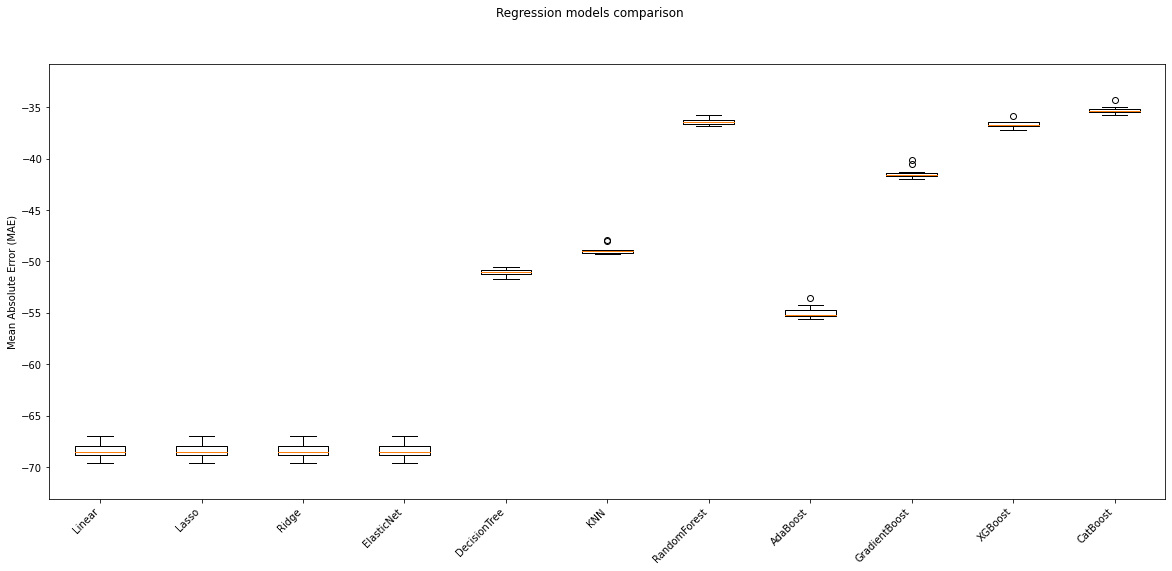

In [ ]:
# Model Building

import time
import datetime

start = 0
end = 0
start = time.time()

# user variables to tune
folds   = 10
metric  = "neg_mean_absolute_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["Ridge"]         = Ridge()
models["ElasticNet"]    = ElasticNet()
models["DecisionTree"]  = DecisionTreeRegressor()
models["KNN"]           = KNeighborsRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["XGBoost"] = XGBRegressor()
models["CatBoost"] = CatBoostRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
	model   = models[model_name]
	k_fold  = KFold(n_splits=folds)
	results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
	
	model_results.append(results)
	model_names.append(model_name)
	print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))
	end = time.time()
	list_lapse = end - start
	print("Time taken for processing {}: {}".format(model_name, str(datetime.timedelta(seconds=list_lapse))))

# box-whisker plot to compare regression models
figure = plt.figure(figsize = (20,8))

figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Absolute Error (MAE)")
plt.margins(0.05, 0.1)

KNN: -65.382, 0.661
Time taken for processing KNN: 0:02:40.066473
RandomForest: -48.837, 0.422
Time taken for processing RandomForest: 0:34:23.595361
AdaBoost: -68.796, 0.647
Time taken for processing AdaBoost: 0:36:20.363113
GradientBoost: -55.027, 0.77
Time taken for processing GradientBoost: 0:43:14.139036
XGBoost: -49.185, 0.507
Time taken for processing XGBoost: 0:44:29.844679
Learning rate set to 0.080471
0:	learn: 112.4304454	total: 9.05ms	remaining: 9.04s
1:	learn: 106.9570877	total: 15ms	remaining: 7.47s
2:	learn: 102.0770830	total: 20.2ms	remaining: 6.73s
3:	learn: 97.6861938	total: 28.4ms	remaining: 7.07s
4:	learn: 93.7932120	total: 34.2ms	remaining: 6.81s
5:	learn: 90.2528201	total: 40ms	remaining: 6.63s
6:	learn: 86.9473631	total: 46.2ms	remaining: 6.56s
7:	learn: 84.0038815	total: 54.5ms	remaining: 6.75s
8:	learn: 81.4439240	total: 60.4ms	remaining: 6.65s
9:	learn: 79.0715891	total: 66.9ms	remaining: 6.62s
10:	learn: 76.9873776	total: 73.3ms	remaining: 6.59s
11:	learn: 75

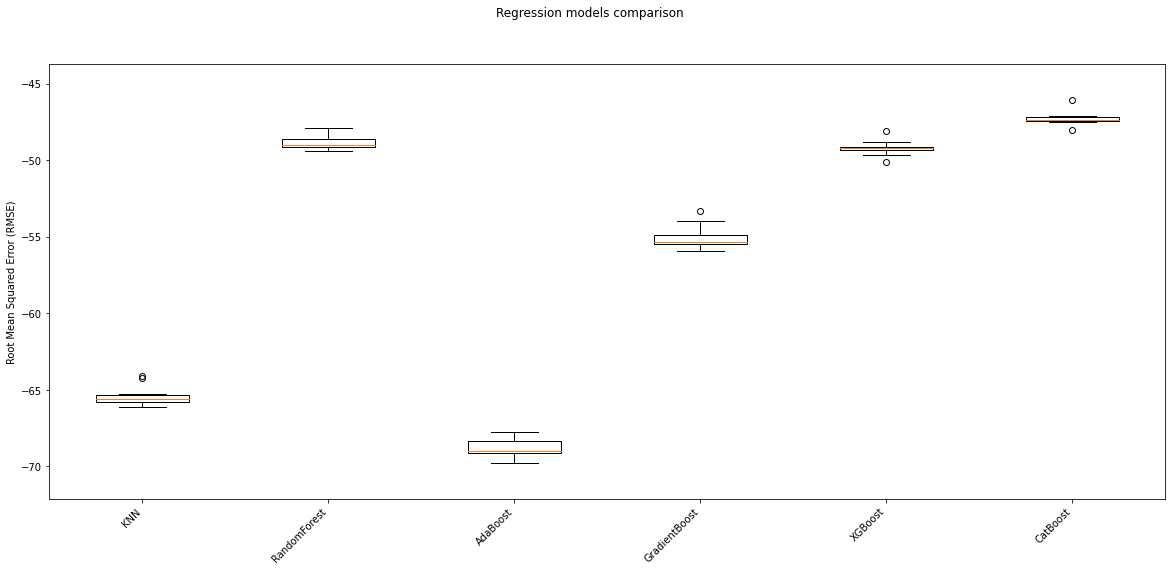

In [ ]:
start = 0
end = 0
start = time.time()

# user variables to tune
folds   = 10
metric  = "neg_root_mean_squared_error"

# hold different regression models in a single dictionary
models = {}

models["KNN"]           = KNeighborsRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["XGBoost"] = XGBRegressor()
models["CatBoost"] = CatBoostRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
	model   = models[model_name]
	k_fold  = KFold(n_splits=folds)
	results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
	
	model_results.append(results)
	model_names.append(model_name)
	print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))
	end = time.time()
	list_lapse = end - start
	print("Time taken for processing {}: {}".format(model_name, str(datetime.timedelta(seconds=list_lapse))))

# box-whisker plot to compare regression models
figure = plt.figure(figsize = (20,8))

figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Root Mean Squared Error (RMSE)")
plt.margins(0.05, 0.1)

KNN: 0.695, 0.007
Time taken for processing KNN: 0:01:39.082201
RandomForest: 0.83, 0.003
Time taken for processing RandomForest: 0:21:47.974493
AdaBoost: 0.663, 0.007
Time taken for processing AdaBoost: 0:23:43.632303
GradientBoost: 0.784, 0.006
Time taken for processing GradientBoost: 0:30:36.492476
XGBoost: 0.827, 0.004
Time taken for processing XGBoost: 0:42:28.014206
Learning rate set to 0.080471
0:	learn: 112.4304454	total: 7.6ms	remaining: 7.6s
1:	learn: 106.9570877	total: 18ms	remaining: 8.97s
2:	learn: 102.0770830	total: 23ms	remaining: 7.65s
3:	learn: 97.6861938	total: 28.9ms	remaining: 7.2s
4:	learn: 93.7932120	total: 34.2ms	remaining: 6.8s
5:	learn: 90.2528201	total: 39.6ms	remaining: 6.56s
6:	learn: 86.9473631	total: 44.6ms	remaining: 6.33s
7:	learn: 84.0038815	total: 49.8ms	remaining: 6.17s
8:	learn: 81.4439240	total: 54.4ms	remaining: 6s
9:	learn: 79.0715891	total: 59.7ms	remaining: 5.91s
10:	learn: 76.9873776	total: 64.7ms	remaining: 5.82s
11:	learn: 75.1436277	total: 6

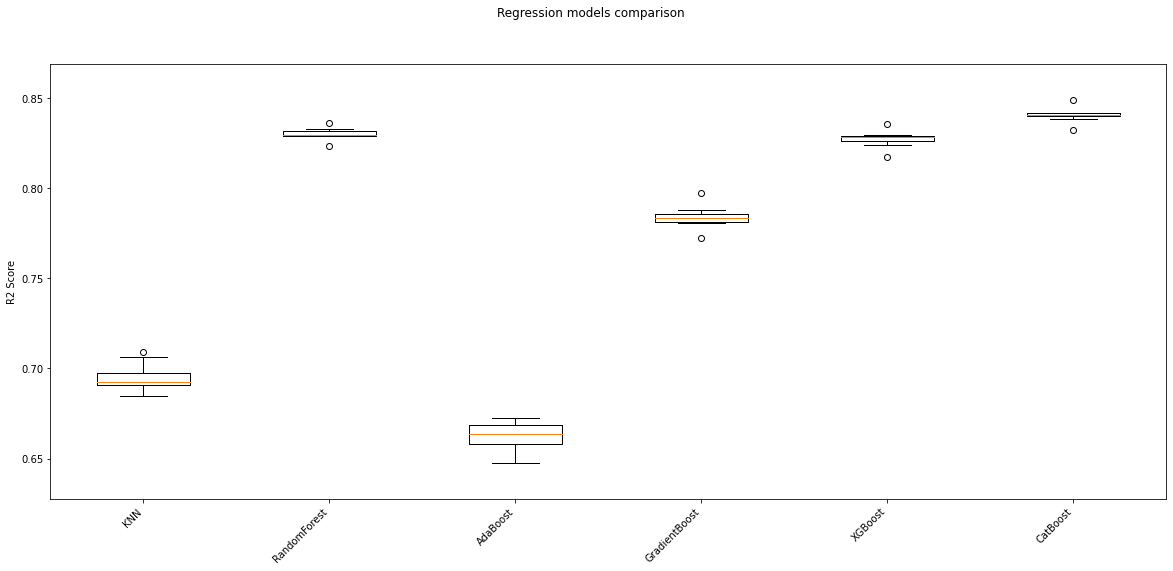

In [ ]:
start = 0
end = 0
start = time.time()

# user variables to tune
folds   = 10
metric  = "r2"

# hold different regression models in a single dictionary
models = {}
models["KNN"]           = KNeighborsRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["XGBoost"] = XGBRegressor()
models["CatBoost"] = CatBoostRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
	model   = models[model_name]
	k_fold  = KFold(n_splits=folds)
	results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
	
	model_results.append(results)
	model_names.append(model_name)
	print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))
	end = time.time()
	list_lapse = end - start
	print("Time taken for processing {}: {}".format(model_name, str(datetime.timedelta(seconds=list_lapse))))

# box-whisker plot to compare regression models
figure = plt.figure(figsize = (20,8))

figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("R2 Score")
plt.margins(0.05, 0.1)

In [26]:
from sklearn.metrics import SCORERS

SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [53]:
cbrmodel = CatBoostRegressor(loss_function='RMSE')
cbrmodel.fit(X_train, y_train)
pred = cbrmodel.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("MAPE: {:.2f}".format(mape))
print("R2: {:.2f}".format(r2))

Learning rate set to 0.078987
0:	learn: 111.2565181	total: 15.5ms	remaining: 15.5s
1:	learn: 104.6866935	total: 25.5ms	remaining: 12.7s
2:	learn: 98.5564911	total: 33.8ms	remaining: 11.2s
3:	learn: 92.9442963	total: 41.7ms	remaining: 10.4s
4:	learn: 87.8684847	total: 49.5ms	remaining: 9.86s
5:	learn: 83.1729296	total: 57.7ms	remaining: 9.56s
6:	learn: 79.0984478	total: 65.8ms	remaining: 9.34s
7:	learn: 75.2737800	total: 74.2ms	remaining: 9.2s
8:	learn: 71.7989551	total: 82.5ms	remaining: 9.09s
9:	learn: 68.7354077	total: 90.8ms	remaining: 8.99s
10:	learn: 65.8621967	total: 99ms	remaining: 8.9s
11:	learn: 63.3020912	total: 108ms	remaining: 8.86s
12:	learn: 60.9229880	total: 115ms	remaining: 8.76s
13:	learn: 58.7698443	total: 123ms	remaining: 8.64s
14:	learn: 56.8725457	total: 130ms	remaining: 8.57s
15:	learn: 55.0492297	total: 138ms	remaining: 8.5s
16:	learn: 53.4467555	total: 146ms	remaining: 8.44s
17:	learn: 51.9785836	total: 154ms	remaining: 8.39s
18:	learn: 50.6567728	total: 162ms	r

In [ ]:
#------ Experiment-1 -------
# PCA components: 20
# RMSE: 49.14
# MAE: 36.71
# MAPE: 0.06
# R2: 0.83
# Aboslute error <=3 1245/20000

#------ Experiment-2 -------
# PCA components: 50
# RMSE: 39.55
# MAE: 29.33
# MAPE: 0.05
# R2: 0.89
# Aboslute error <=3 1631/20000

#------ Experiment-3 -------
# PCA components: 80
# RMSE: 39.33
# MAE: 28.58
# MAPE: 0.05
# R2: 0.89
# Aboslute error <=3 1940/20000